### Heart attack predictions

### About this dataset

In [1]:
## pandas 
import pandas as pd
import numpy as np
## visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing the data

In [2]:
df = pd.read_csv('heart.csv')
sat = pd.read_csv('o2Saturation.csv')

In [3]:
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(sat.shape)
# sat.head()

(3585, 1)


In [5]:
# ex_list = ['yes','no']
# ex_id = [1,0]
# cp_list = ['typical angina','atypical angina','non-anginal pain','asymptomatic']
# cp_id = [0,1,2,3]

In [6]:
# df['exng'].replace(ex_id,ex_list,True)

In [7]:
# df['cp'].replace(cp_id,cp_list,True)

### Info on the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: output, dtype: int64


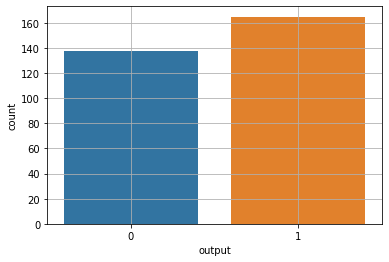


% values
1    54.46
0    45.54
Name: output, dtype: float64


In [11]:
sns.countplot(df.output)
print(df.output.value_counts())
plt.grid()
plt.show()
print('\n% values')
print(round(df.output.value_counts(normalize=True)*100,2))

In [12]:
for i in df.columns:
    print(i,':',df[i].nunique())

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


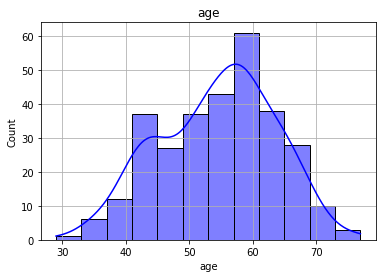

------------------------------------------------------------


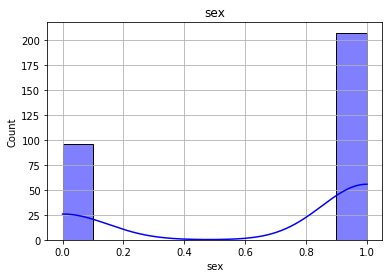

------------------------------------------------------------


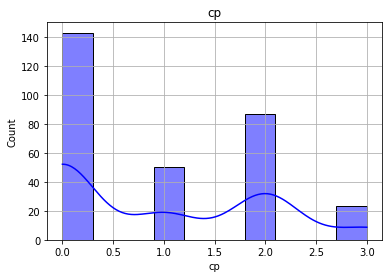

------------------------------------------------------------


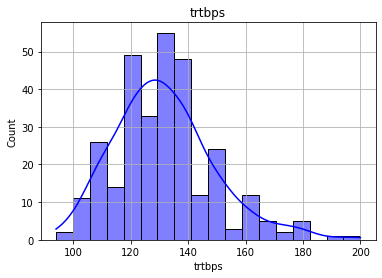

------------------------------------------------------------


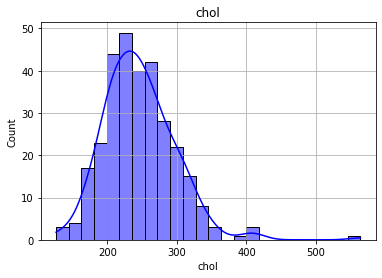

------------------------------------------------------------


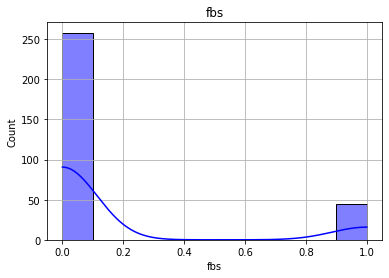

------------------------------------------------------------


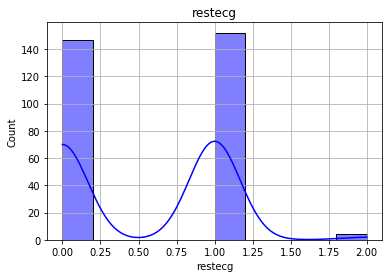

------------------------------------------------------------


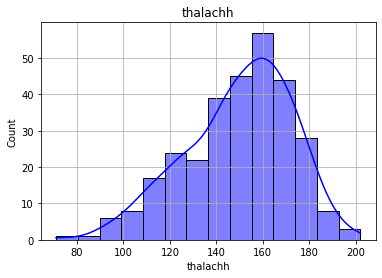

------------------------------------------------------------


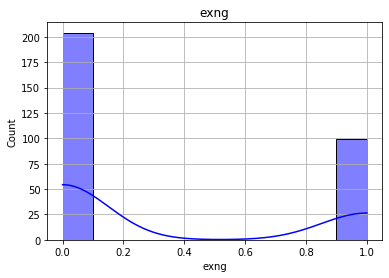

------------------------------------------------------------


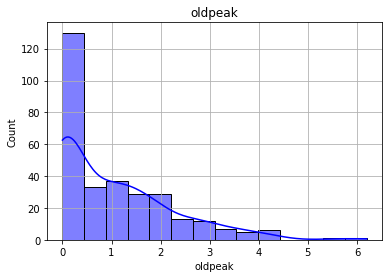

------------------------------------------------------------


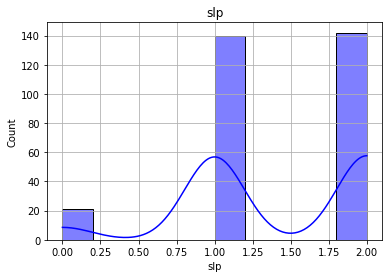

------------------------------------------------------------


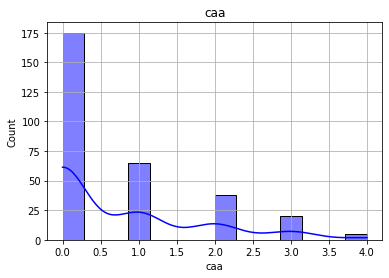

------------------------------------------------------------


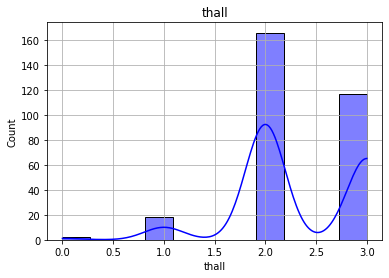

------------------------------------------------------------


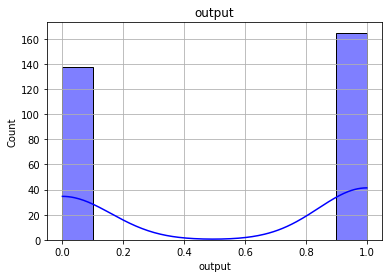

------------------------------------------------------------


In [13]:
for i in df.columns:
    if df.astype != 'O':
        sns.histplot(df[i],kde=True,color='b')
        plt.title(i)
        plt.grid()
        plt.show()
        print('---'*20)

### Analysis and feature engineering

In [14]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


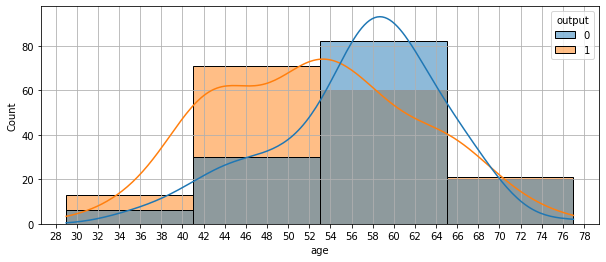

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(data = df, x = 'age',fill=True,bins=4,hue='output',kde=True)
plt.xticks(np.arange(28,80,2))
plt.grid()
plt.show()

In [16]:
ac = []
for i in df.age:
    if i < 42:
        ac.append('young')
    elif 42 <= i < 54:
        ac.append('middle age')
    elif 54 <= i < 66:
        ac.append('upper middle age')
    elif i > 65:
        ac.append('old')
df['age_catg'] = ac

In [17]:
col = df.pop('age_catg')
df.insert(1,'age_catg',col)

In [18]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Count of male and female who have the risk of a heart attack

In [19]:
sex_op = pd.DataFrame(df.sex.groupby(df.output).value_counts(normalize=False))

In [20]:
pr = round(sex_op['sex']*100,2)

In [21]:
sex_op['percentage'] = pr

In [22]:
sex_op

sex  percentage
output sex                 
0      1    114       11400
       0     24        2400
1      1     93        9300
       0     72        7200

### Inference : 82% of people who dont have the risk of heart attack are 1s. 18% are 0s. 56% of people who have the risk of a heart attack are 1s. remaining 43 % are 0's.

### Average age of people with and without the risk of a heart attack and their gender

In [23]:
pd.DataFrame(df.groupby(['output','sex']).mean())['age']

output  sex
0       0      59.041667
        1      56.087719
1       0      54.555556
        1      50.903226
Name: age, dtype: float64

### Inference : surprisingly, the average age of people who have a risk is lower than the average age of people who do not have a risk (in both genders). In other words, Younger people in both genders have a higher risk of a heart attack than the elder people.

### Average cholestrol levels of the people with and without the risk of a heart attack and their gender

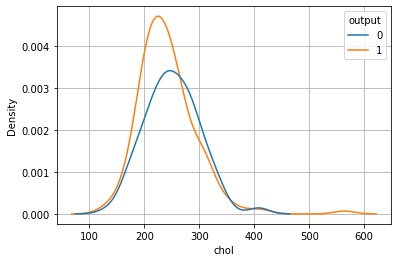

In [24]:
sns.kdeplot(data=df,x='chol',hue='output')
plt.grid()
plt.show()

In [25]:
pd.DataFrame(df.groupby(['output','sex']).mean())['chol']

output  sex
0       0      274.958333
        1      246.061404
1       0      256.750000
        1      230.989247
Name: chol, dtype: float64

### Inference : another surprising inference is that the average cholestrol levels of both genders having the risk of a  heart attack is lower than both genders of those who don't. 

### distribution of age wrt FBS

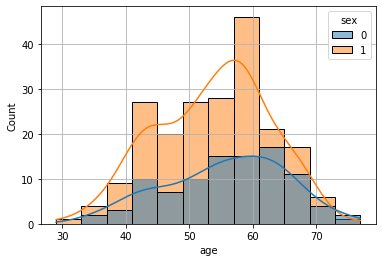

In [26]:
sns.histplot(data=df,x='age',hue='sex',kde=True)
plt.grid()
plt.show()

### age distribution wrt output

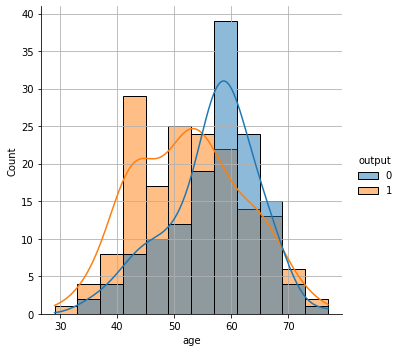

In [27]:
sns.displot(data=df,x='age',hue='output',kde=True)
plt.grid()
plt.show()

### Age category and the number of people having a risk of a heart attack.

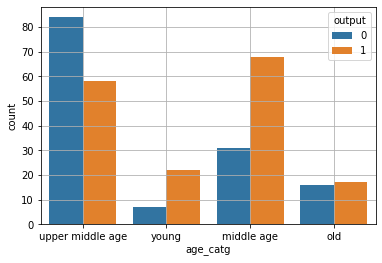

In [28]:
sns.countplot(df.age_catg,hue=df.output)
plt.grid()
plt.show()

### Inference :  The middle aged people (age between 42 and 54) and the young people (age less than 42) are more affected with a risk of a heart attack.

In [29]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Average chol values wrt output and Resting ECG 

In [30]:
pd.DataFrame(df.groupby(['output','restecg']).mean()['chol'])

chol
output restecg            
0      0        255.227848
       1        243.517857
       2        283.333333
1      0        255.044118
       1        233.625000
       2        197.000000

### Inference : the average cholestrol levels of people who have a risk of a heart attack and a restingecg value 2 is significantly lower than the rest.

### gender, sex wrt average maximum heartrate

In [31]:
pd.DataFrame(df.groupby(['output','sex']).mean()['thalachh'])

thalachh
output sex            
0      0    142.416667
       1    138.403509
1      0    154.027778
       1    161.903226

### Inference : the maximum heartrate average for people who have a risk of a heart attack is higher than the average of people who do not posses a risk.

### Output, sex and average resting heart rate

In [32]:
pd.DataFrame(df.groupby(['output','sex']).mean()['trtbps'])

trtbps
output sex            
0      0    146.125000
       1    131.929825
1      0    128.736111
       1    129.741935

### Inference : the maximum resting heartrate average for people who have a risk of a heart attack is lower than the average of people who do not posses a risk.

### Output and sex of people and the average values of the paramters that are not static 

In [33]:
pd.DataFrame(df.groupby(['output','sex']).mean()[['age','chol','restecg','thalachh']])

age        chol   restecg    thalachh
output sex                                             
0      0    59.041667  274.958333  0.541667  142.416667
       1    56.087719  246.061404  0.429825  138.403509
1      0    54.555556  256.750000  0.583333  154.027778
       1    50.903226  230.989247  0.602151  161.903226

In [34]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
exag_out_cp_chol = pd.DataFrame(df.groupby(['output','exng','cp','sex']).mean()['chol'])

In [36]:
exag_out_cp_chol

chol
output exng cp sex            
0      0    0  0    278.000000
               1    240.814815
            1  0    277.500000
               1    261.666667
            2  0    263.000000
               1    225.461538
            3  1    257.500000
       1    0  0    273.928571
               1    248.535714
            1  1    246.000000
            2  1    277.000000
            3  1    231.000000
1      0    0  0    249.642857
               1    236.600000
            1  0    243.857143
               1    236.500000
            2  0    263.406250
               1    227.166667
            3  0    247.000000
               1    229.666667
       1    0  0    289.500000
               1    227.666667
            1  0    278.500000
               1    221.000000
            2  0    222.500000
               1    233.000000
            3  1    207.666667

In [37]:
op = []
for i in exag_out_cp_chol.index:
    op.append(i[0])
exg = []
for i in exag_out_cp_chol.index:
    exg.append(i[1])
cp = []
for i in exag_out_cp_chol.index:
    cp.append(i[2])
mf = []
for i in exag_out_cp_chol.index:
    mf.append(i[3])

In [38]:
exag_out_cp_chol['output'] = op
exag_out_cp_chol['exang'] = exg
exag_out_cp_chol['chest_pain'] = cp
exag_out_cp_chol['sex'] = mf

In [39]:
exag_out_cp_chol

chol  output  exang  chest_pain  sex
output exng cp sex                                            
0      0    0  0    278.000000       0      0           0    0
               1    240.814815       0      0           0    1
            1  0    277.500000       0      0           1    0
               1    261.666667       0      0           1    1
            2  0    263.000000       0      0           2    0
               1    225.461538       0      0           2    1
            3  1    257.500000       0      0           3    1
       1    0  0    273.928571       0      1           0    0
               1    248.535714       0      1           0    1
            1  1    246.000000       0      1           1    1
            2  1    277.000000       0      1           2    1
            3  1    231.000000       0      1           3    1
1      0    0  0    249.642857       1      0           0    0
               1    236.600000       1      0           0    1
            1  0    243.857143       1      0           1    0
               1    236.500000       1      0           1    1
            2  0    263.406250       1      0           2    0
               1    227.166667       1      0           2    1
            3  0    247.000000       1      0           3    0
               1    229.666667       1      0           3    1
       1    0  0    289.500000       1      1           0    0
               1    227.666667       1      1           0    1
            1  0    278.500000       1      1           1    0
               1    221.000000       1      1           1    1
            2  0    222.500000       1      1           2    0
               1    233.000000       1      1           2    1
            3  1    207.666667       1      1           3    1

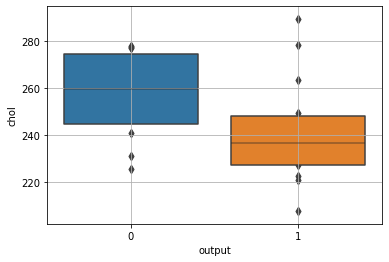

In [40]:
sns.boxenplot(exag_out_cp_chol.output , exag_out_cp_chol.chol)
plt.grid()
plt.show()

### Inferecne : the cholestrol levels on average for people who have the risk of a heart attack is surpriseingly lower than those who do not have a risk.

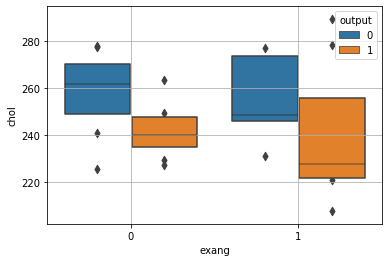

In [41]:
sns.boxenplot(exag_out_cp_chol.exang , exag_out_cp_chol.chol,hue=exag_out_cp_chol.output)
plt.grid()
plt.show()

### Inference : we can see, for exang 1, the chol levels of people who have a risk is again lower than the ones who dont have the risk. Similarly, when exang 0, the chol levels for people who are in risk is again lower than those who dont.

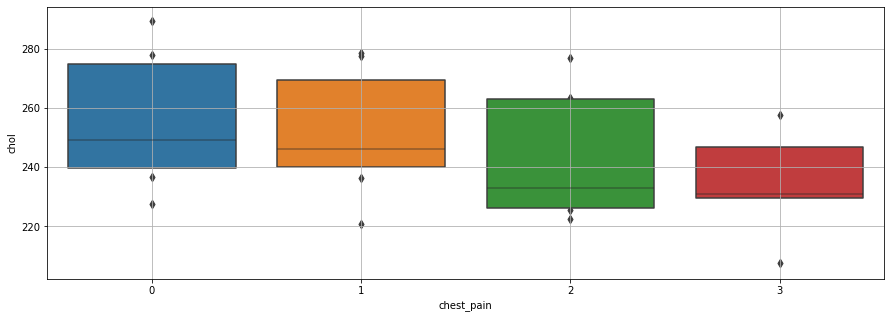

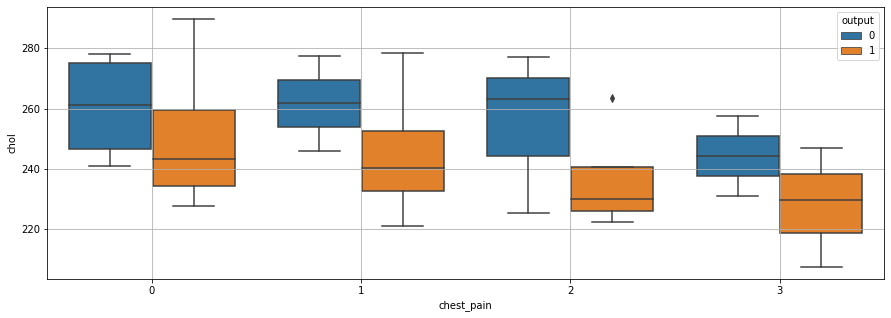

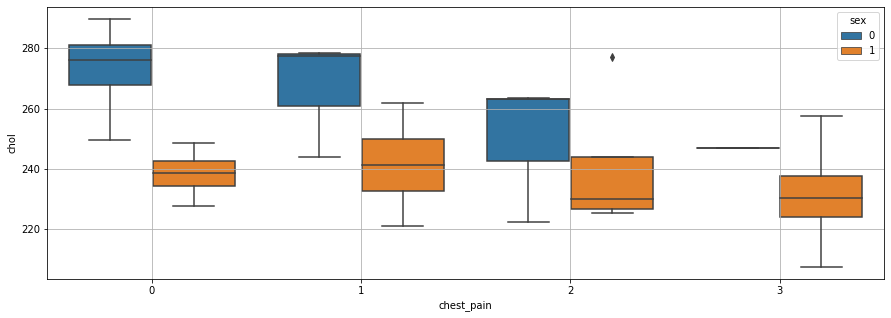

In [42]:
plt.figure(figsize=(15,5))
sns.boxenplot(exag_out_cp_chol.chest_pain , exag_out_cp_chol.chol)
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(data = exag_out_cp_chol , x = 'chest_pain' , y = 'chol' , hue='output')
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(data = exag_out_cp_chol , x = 'chest_pain' , y = 'chol' , hue='sex')
plt.grid()
plt.show()

### Inference, the median of chol levels are the highest for people with type 2 chest pain. (atypical) while its the lowest for type 4 cp ( asymptomatic)

In [43]:
# cp : Chest Pain type chest pain type
# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

In [44]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


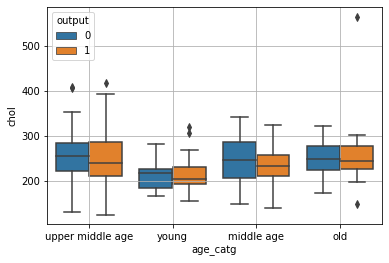

In [45]:
sns.boxplot(data = df, x = 'age_catg',y = 'chol',hue='output')
plt.grid()
plt.show()